In [5]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from CCDC_Processing import geo_utils
from CCDC_Processing.classification import tile_training
from scipy.ndimage.measurements import find_objects
from scipy import ndimage
import numpy as np
import numpy.ma as ma

In [9]:
h = 14
v = 5
trends = r'D:\lcmap\data\CONUS_LandCover_Trends2000\Trendsblock_2000.img'

In [10]:
ext = tile_training.tile_extent_from_hv(h=h, v=v)
print ext

GeoExtent(x_min=-465585, y_max=2564805, x_max=-315585, y_min=2414805)


In [11]:
trends_arr = geo_utils.array_from_rasterband(trends, geo_extent=ext)
print trends_arr.shape

(5000L, 5000L)


In [12]:
labels, numobjects = ndimage.label(trends_arr)

slices = find_objects(labels)
print slices

[(slice(0L, 87L, None), slice(4690L, 5000L, None)), (slice(754L, 1087L, None), slice(3690L, 4023L, None)), (slice(1088L, 1421L, None), slice(4690L, 5000L, None)), (slice(2088L, 2421L, None), slice(3690L, 4023L, None)), (slice(3754L, 4087L, None), slice(2690L, 3023L, None))]


In [29]:
for y, x in slices:
    print y.start, x.start
    print y.stop, x.stop

0 4690
87 5000
754 3690
1087 4023
1088 4690
1421 5000
2088 3690
2421 4023
3754 2690
4087 3023


In [13]:
for y, x in slices:
    print y.start, y.stop
    print x.start, x.stop
    break

0 87
4690 5000


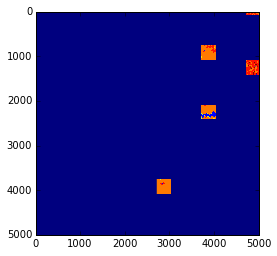

In [14]:
fig, ax = plt.subplots()
ax.imshow(trends_arr)

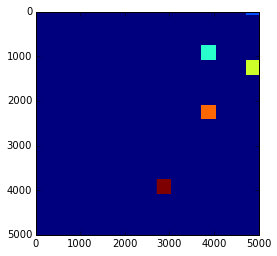

In [15]:
fig, ax = plt.subplots()
ax.imshow(labels)

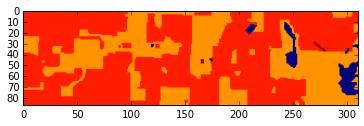

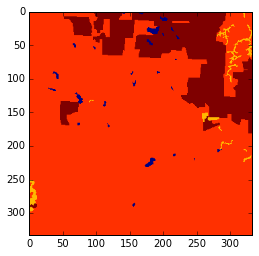

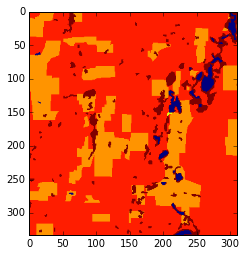

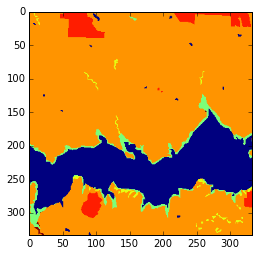

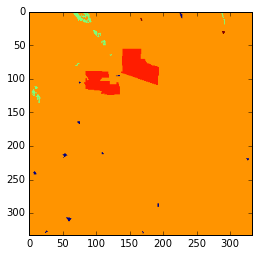

In [16]:
for sli in slices:
    fig, ax = plt.subplots()
    ax.imshow(trends_arr[sli])